In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/Users/sanjaymahto/Titanic/Project/Titanic/data/raw/train.csv')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df = df[['Survived','Pclass', 'Sex', "Age", "SibSp", "Fare", "Embarked"]]

In [8]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,male,22.0,1,7.2500,S
1,1,1,female,38.0,1,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,1,53.1000,S
4,0,3,male,35.0,0,8.0500,S


In [9]:
# Check for missing values 
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Fare          0
Embarked      2
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


### EDA

/var/folders/wg/8rqwg0nd7995t2tzgq40dsph0000gn/T/ipykernel_13251/2257083324.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Age'], shade=True)


<Axes: xlabel='Age', ylabel='Density'>

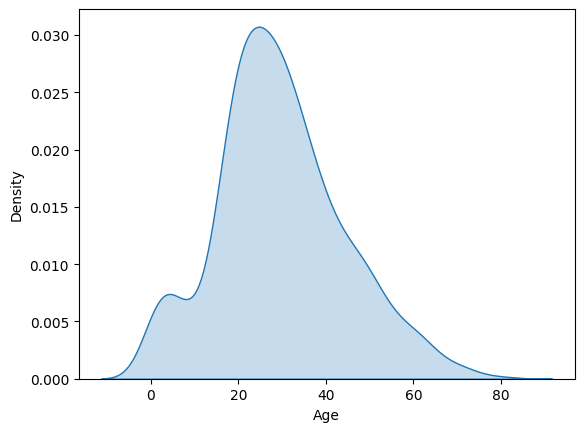

In [11]:
# distribution of age column 
sns.kdeplot(df['Age'], shade=True)

In [12]:
# Skewness of age column 
df['Age'].skew()

np.float64(0.38910778230082704)

/var/folders/wg/8rqwg0nd7995t2tzgq40dsph0000gn/T/ipykernel_13251/2771723540.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Fare'], shade=True)


<Axes: xlabel='Fare', ylabel='Density'>

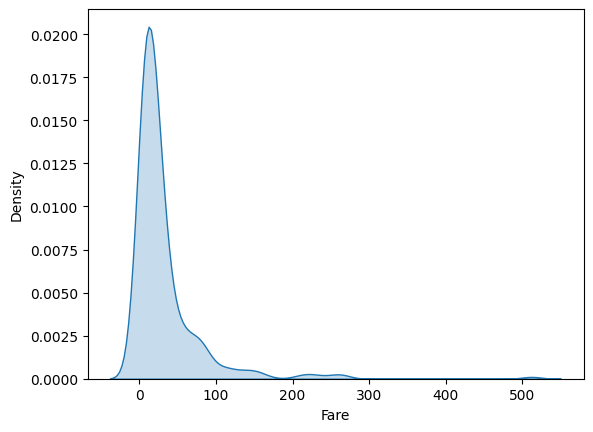

In [13]:
# Distribution of fare column
sns.kdeplot(df['Fare'], shade=True)

In [14]:
# Skewness of fare column
df['Fare'].skew()

np.float64(4.787316519674893)

<Axes: xlabel='Pclass', ylabel='count'>

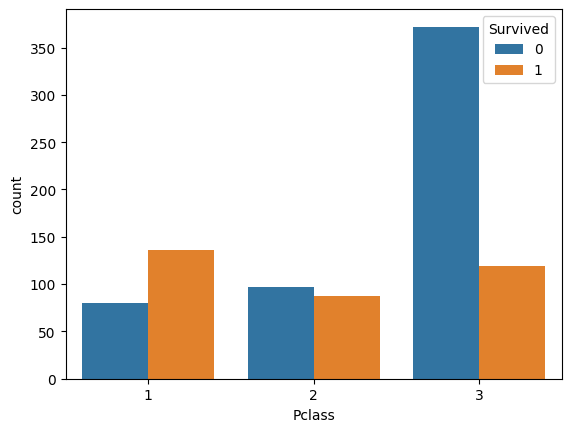

In [17]:
# Distribution of pcalss
sns.countplot(data = df, x ='Pclass', hue='Survived')

<Axes: xlabel='Pclass', ylabel='Fare'>

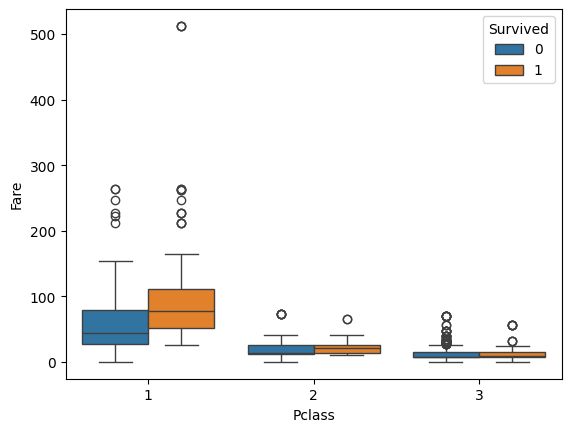

In [19]:
# Boxc plot o Pcalss vs Fare
sns.boxplot(data = df, x='Pclass', y='Fare', hue='Survived')

([<matplotlib.patches.Wedge at 0x115bfda60>,
 [Text(-0.4919454315896098, 0.9838646717603559, 'male'),
  Text(0.49194551760179267, -0.9838646287531149, 'female')],
 [Text(-0.26833387177615076, 0.5366534573238304, '64.8%'),
  Text(0.2683339186918869, -0.5366534338653353, '35.2%')])

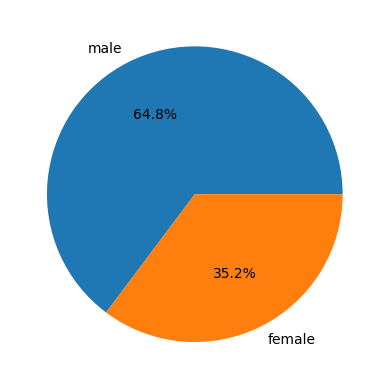

In [20]:
# Gender distribution
plt.pie(df['Sex'].value_counts(), labels=df['Sex'].value_counts().index, autopct='%1.1f%%')

### Target Distribution

<Axes: xlabel='Survived', ylabel='count'>

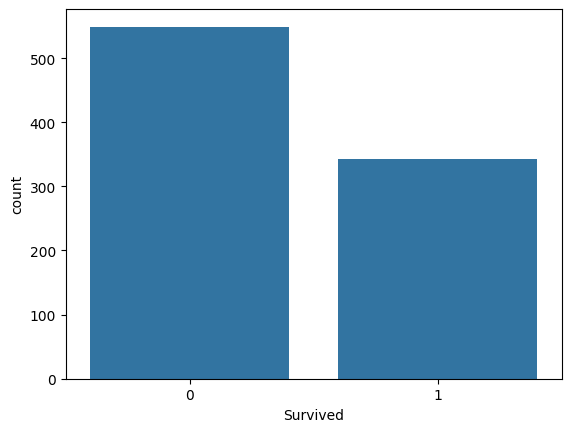

In [21]:
# Target class distribution
sns.countplot(data=df, x='Survived')

In [22]:
## Data Preparation
# Create X and y 
X = df.drop('Survived', axis=1)
y = df['Survived']

In [24]:
# Train test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('The shpae of X_train is:', X_train.shape)
print('The shpae of X_test is:', X_test.shape)

The shpae of X_train is: (712, 6)
The shpae of X_test is: (179, 6)


In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.impute import SimpleImputer

In [26]:
from IPython.display import display
from PIL import Image

In [27]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked'], dtype='object')

### Feature Preprocessing

In [49]:
# create the Pipeline for age

age_pipe = Pipeline(steps=[
    ('impute',SimpleImputer(strategy='mean')),
    ('scale',StandardScaler())
])


# create pipeline for embarked
embarked_pipe = Pipeline(steps=[
    ('impute',SimpleImputer(strategy="most_frequent")),
    ('one_hot',OneHotEncoder(handle_unknown='ignore',drop='first',sparse_output=False))
])

In [50]:
age_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('scale', StandardScaler())])

In [51]:
embarked_pipe

Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                ('one_hot',
                 OneHotEncoder(drop='first', handle_unknown='ignore',
                               sparse_output=False))])

In [52]:
# data preprocessing

preprocessor = ColumnTransformer(transformers=[
    ('age',age_pipe,['Age']),
    ('embarked',embarked_pipe,['Embarked']),
    ('fare',PowerTransformer(),['Fare']),
    ('sex',OneHotEncoder(sparse_output=False,handle_unknown='ignore'),['Sex']),
    
], remainder='passthrough')

preprocessor.set_output(transform='pandas')

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('age',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('scale', StandardScaler())]),
                                 ['Age']),
                                ('embarked',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one_hot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Embarked']),
                                ('fare', PowerTransformer(), ['Fare']),
                                ('sex',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['Sex'])])

### Model Pipeline

In [53]:
# model pipeline

clf = RandomForestClassifier()

model_pipe = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',clf)
])

model_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('age',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('embarked',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Embarked']),
                                                 ('fare', PowerTransformer(),
                                                  ['Fare']),
                                                 ('sex',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Sex'])])),
                ('model', RandomForestClassifier())])

# Model Training 

In [54]:
# fit the model on training data

model_pipe.fit(X_train,y_train)

/Users/sanjaymahto/Titanic/Project/Titanic/titanic/lib/python3.9/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('age',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('embarked',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Embarked']),
                                                 ('fare', PowerTransformer(),
                                                  ['Fare']),
                                                 ('sex',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Sex'])])),
                ('model', RandomForestClassifier())])

### Predictions and Evaluation

In [55]:
# do predictions

y_pred_train = model_pipe.predict(X_train) 

y_pred_test = model_pipe.predict(X_test)

In [56]:
# calculate the accuracy
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train,y_pred_train) 

test_acc = accuracy_score(y_test,y_pred_test)

print('The train accuracy is ',train_acc)
print('The test accuracy is ',test_acc)

The train accuracy is  0.9789325842696629
The test accuracy is  0.7988826815642458


In [57]:
# do cross validation

from sklearn.model_selection import cross_val_score

score = cross_val_score(estimator=model_pipe,X=X_train,y=y_train,
                        scoring='accuracy',cv=5,n_jobs=-1)

In [58]:
# mean validation score
print('The avg validation score is',np.mean(score))

The avg validation score is 0.8048163104501134


In [59]:
score

array([0.8041958 , 0.77622378, 0.81690141, 0.8028169 , 0.82394366])

### Hp tuning of model

In [60]:
# define the params grid

params = {
    'preprocessor__age__impute__strategy':['mean','median'],
    'model__n_estimators':list(range(100,550,50))
}

In [61]:
# do hyperparameter tuning using grid_search

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=model_pipe, param_grid=params, scoring='accuracy', 
                           n_jobs=-1, cv=5, return_train_score=True,verbose=2)

In [62]:
# fit on training data

grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END model__n_estimators=100, preprocessor__age__impute__strategy=mean; total time=   0.3s
[CV] END model__n_estimators=100, preprocessor__age__impute__strategy=mean; total time=   0.3s
[CV] END model__n_estimators=100, preprocessor__age__impute__strategy=mean; total time=   0.3s
[CV] END model__n_estimators=100, preprocessor__age__impute__strategy=mean; total time=   0.4s
[CV] END model__n_estimators=100, preprocessor__age__impute__strategy=median; total time=   0.3s
[CV] END model__n_estimators=100, preprocessor__age__impute__strategy=median; total time=   0.1s
[CV] END model__n_estimators=100, preprocessor__age__impute__strategy=median; total time=   0.2s
[CV] END model__n_estimators=150, preprocessor__age__impute__strategy=mean; total time=   0.3s
[CV] END model__n_estimators=150, preprocessor__age__impute__strategy=mean; total time=   0.3s
[CV] END model__n_estimators=150, preprocessor__age__impute__strategy=mean; to

/Users/sanjaymahto/Titanic/Project/Titanic/titanic/lib/python3.9/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('age',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer()),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['Age']),
                                                                        ('embarked',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('one_hot',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        spars...
                                                                         ['Embarked']),
                                                                        ('fare',
                                                                         PowerTransformer(),
                                                                         ['Fare']),
                                                                        ('sex',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Sex'])])),
                                       ('model', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'model__n_estimators': [100, 150, 200, 250, 300, 350,
                                                 400, 450, 500],
                         'preprocessor__age__impute__strategy': ['mean',
                                                                 'median']},
             return_train_score=True, scoring='accuracy', verbose=2)

In [63]:
# best estimator

best_model = grid_search.best_estimator_

# best_params
grid_search.best_params_

{'model__n_estimators': 500, 'preprocessor__age__impute__strategy': 'median'}

In [64]:
# best score
grid_search.best_score_

np.float64(0.8118487146656161)

In [65]:
# best index value
grid_search.best_index_

np.int64(17)

In [66]:
results = pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,param_preprocessor__age__impute__strategy,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.261842,0.055166,0.023287,0.009889,100,mean,"{'model__n_estimators': 100, 'preprocessor__ag...",0.790210,0.790210,0.802817,...,0.803408,0.021447,12,0.97891,0.984183,0.982456,0.982456,0.982456,0.982092,0.001726
1,0.161816,0.030573,0.021575,0.013501,100,median,"{'model__n_estimators': 100, 'preprocessor__ag...",0.811189,0.776224,0.802817,...,0.799173,0.012728,18,0.97891,0.984183,0.978947,0.978947,0.980702,0.980338,0.002041
2,0.333635,0.058135,0.031478,0.010081,150,mean,"{'model__n_estimators': 150, 'preprocessor__ag...",0.804196,0.783217,0.809859,...,0.803398,0.013637,13,0.97891,0.984183,0.982456,0.982456,0.982456,0.982092,0.001726
3,0.337881,0.017684,0.021236,0.005894,150,median,"{'model__n_estimators': 150, 'preprocessor__ag...",0.804196,0.783217,0.816901,...,0.807623,0.022148,5,0.97891,0.984183,0.978947,0.978947,0.980702,0.980338,0.002041
4,0.296930,0.033867,0.021689,0.009127,200,mean,"{'model__n_estimators': 200, 'preprocessor__ag...",0.811189,0.797203,0.795775,...,0.806185,0.010400,8,0.97891,0.984183,0.982456,0.982456,0.982456,0.982092,0.001726
5,0.274461,0.021720,0.017602,0.004653,200,median,"{'model__n_estimators': 200, 'preprocessor__ag...",0.804196,0.783217,0.802817,...,0.804806,0.018197,10,0.97891,0.984183,0.978947,0.978947,0.980702,0.980338,0.002041
6,0.333437,0.017242,0.029568,0.005765,250,mean,"{'model__n_estimators': 250, 'preprocessor__ag...",0.811189,0.790210,0.809859,...,0.807604,0.014193,6,0.97891,0.984183,0.982456,0.982456,0.982456,0.982092,0.001726
7,0.307190,0.034350,0.022627,0.006712,250,median,"{'model__n_estimators': 250, 'preprocessor__ag...",0.811189,0.783217,0.809859,...,0.809022,0.020719,2,0.97891,0.984183,0.978947,0.978947,0.980702,0.980338,0.002041
8,0.406742,0.033265,0.028080,0.009199,300,mean,"{'model__n_estimators': 300, 'preprocessor__ag...",0.811189,0.769231,0.802817,...,0.800591,0.015953,17,0.97891,0.984183,0.982456,0.982456,0.982456,0.982092,0.001726
9,0.417386,0.034412,0.024003,0.007976,300,median,"{'model__n_estimators': 300, 'preprocessor__ag...",0.790210,0.769231,0.802817,...,0.802029,0.022686,15,0.97891,0.984183,0.978947,0.978947,0.980702,0.980338,0.002041
